In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
data = pd.read_csv(r'G:\Udemy Courses Files\Python Machine Learning Diploma\2-feature-engineering\datasets\feature_data.csv')
data

,First Name,Last Name,Age,Salary,Region,Purchased
0,Ahmed,Radwan,35.0,3000.0,Asia,No
1,Mustafa,Othman,34.0,12000.0,Africa,Yes
2,Omnia,Nasser,28.0,7000.0,Africa,No
3,Saddik,Burhan,45.0,8500.0,Europe,No
4,Mustafa,Jalil,38.0,45000.0,Africa,Yes
5,Hesham,Naser,NaN,NaN,Asia,Yes
6,Abulrahman,NaN,26.0,6700.0,Asia,No
7,Mohamed,Ouda,33.0,10500.0,Asia,Yes
8,Mariam,Mazen,18.0,NaN,Africa,No


## Feature Scaling and Transformation

#### Normalization (sklearn.preprocessing.MinMaxScaler)

The transformation is given by:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

In [16]:
data['Salary']

0     3000.0
1    12000.0
2     7000.0
3     8500.0
4    45000.0
5        NaN
6     6700.0
7    10500.0
8        NaN
Name: Salary, dtype: float64

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(data[['Salary']])    # Compute the minimum and maximum to be used for later scaling.

MinMaxScaler()

In [15]:
scaler.transform(data[['Salary']])  # (X - min) / (max - min)
                                    # Scale features of X according to feature_range.[0-1] or [-1,1]

array([[0.        ],
       [0.21428571],
       [0.0952381 ],
       [0.13095238],
       [1.        ],
       [       nan],
       [0.08809524],
       [0.17857143],
       [       nan]])

In [25]:
normal_scaled = scaler.fit_transform(data[['Salary']])  # fit and transform at the same time
normal_scaled

array([[0.        ],
       [0.21428571],
       [0.0952381 ],
       [0.13095238],
       [1.        ],
       [       nan],
       [0.08809524],
       [0.17857143],
       [       nan]])

In [34]:
scaled_salary = pd.Series(normal_scaled.reshape(-1))
scaled_salary


0    0.000000
1    0.214286
2    0.095238
3    0.130952
4    1.000000
5         NaN
6    0.088095
7    0.178571
8         NaN
dtype: float64

In [ ]:
# Add the Scaled data to the original data and remove the original salary column

# data['Scaled'] = scaled_salary

#### Standardization (sklearn.preprocessing.StandardScaler)

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero and s is the standard deviation of the training samples or one

In [41]:
data['Salary']

0     3000.0
1    12000.0
2     7000.0
3     8500.0
4    45000.0
5        NaN
6     6700.0
7    10500.0
8        NaN
Name: Salary, dtype: float64

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc = StandardScaler()

In [38]:
sc.fit(data[['Salary']])    # Compute the mean and std to be used for later scaling.

StandardScaler()

In [39]:
sc.transform(data[['Salary']])  # (X - mean) / std
                                # Perform standardization by centering and scaling.
                                # Usually Range: [-2,2] or [-3,3]

array([[-0.77372619],
       [-0.09388309],
       [-0.4715737 ],
       [-0.35826652],
       [ 2.39887492],
       [        nan],
       [-0.49423514],
       [-0.20719028],
       [        nan]])

In [40]:
sc.fit_transform(data[['Salary']])  # fit and transform at the same time

array([[-0.77372619],
       [-0.09388309],
       [-0.4715737 ],
       [-0.35826652],
       [ 2.39887492],
       [        nan],
       [-0.49423514],
       [-0.20719028],
       [        nan]])

## categorical Feature Encoding

##### Label / Integer Encoding (Sklearn.preprocessing.LabelEncoder)

In [46]:
data

,First Name,Last Name,Age,Salary,Region,Purchased
0,Ahmed,Radwan,35.0,3000.0,Asia,No
1,Mustafa,Othman,34.0,12000.0,Africa,Yes
2,Omnia,Nasser,28.0,7000.0,Africa,No
3,Saddik,Burhan,45.0,8500.0,Europe,No
4,Mustafa,Jalil,38.0,45000.0,Africa,Yes
5,Hesham,Naser,NaN,NaN,Asia,Yes
6,Abulrahman,NaN,26.0,6700.0,Asia,No
7,Mohamed,Ouda,33.0,10500.0,Asia,Yes
8,Mariam,Mazen,18.0,NaN,Africa,No


In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()

In [45]:
le.fit_transform(data[['Region']])

c:\Users\Amr Ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 0, 0, 2, 0, 1, 1, 1, 0])

In [47]:
le.fit_transform(data[['Purchased']])

c:\Users\Amr Ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 0, 0, 1, 1, 0, 1, 0])

##### One Hot / Dummy Encoding (Sklearn.preprocessing.OneHotEncoder)

In [48]:
data

,First Name,Last Name,Age,Salary,Region,Purchased
0,Ahmed,Radwan,35.0,3000.0,Asia,No
1,Mustafa,Othman,34.0,12000.0,Africa,Yes
2,Omnia,Nasser,28.0,7000.0,Africa,No
3,Saddik,Burhan,45.0,8500.0,Europe,No
4,Mustafa,Jalil,38.0,45000.0,Africa,Yes
5,Hesham,Naser,NaN,NaN,Asia,Yes
6,Abulrahman,NaN,26.0,6700.0,Asia,No
7,Mohamed,Ouda,33.0,10500.0,Asia,Yes
8,Mariam,Mazen,18.0,NaN,Africa,No


In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
enc = OneHotEncoder()

In [53]:
enc.fit_transform(data[['Region']]).toarray()

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [55]:
pd.get_dummies(data['Region'])

,Africa,Asia,Europe
0,False,True,False
1,True,False,False
2,True,False,False
3,False,False,True
4,True,False,False
5,False,True,False
6,False,True,False
7,False,True,False
8,True,False,False


In [57]:
pd.get_dummies(data['Purchased'], drop_first=True)

,Yes
0,False
1,True
2,False
3,False
4,True
5,True
6,False
7,True
8,False


## Feature Cleaning & Outliers Handling
    - Missing Data
    - Outliers

##### Handling Missing Data (**Sklearn.impute.SimpleImputer**)
Univariate imputer for completing missing values with simple strategies

In [61]:
data

,First Name,Last Name,Age,Salary,Region,Purchased
0,Ahmed,Radwan,35.0,3000.0,Asia,No
1,Mustafa,Othman,34.0,12000.0,Africa,Yes
2,Omnia,Nasser,28.0,7000.0,Africa,No
3,Saddik,Burhan,45.0,8500.0,Europe,No
4,Mustafa,Jalil,38.0,45000.0,Africa,Yes
5,Hesham,Naser,NaN,NaN,Asia,Yes
6,Abulrahman,NaN,26.0,6700.0,Asia,No
7,Mohamed,Ouda,33.0,10500.0,Asia,Yes
8,Mariam,Mazen,18.0,NaN,Africa,No


In [59]:
from sklearn.impute import SimpleImputer

In [60]:
#imp_mean = SimpleImputer(strategy='constant', fill_value=35)
imp_mean = SimpleImputer(strategy='mean')

In [62]:
imp_mean.fit_transform(data[['Salary']])

array([[ 3000.        ],
       [12000.        ],
       [ 7000.        ],
       [ 8500.        ],
       [45000.        ],
       [13242.85714286],
       [ 6700.        ],
       [10500.        ],
       [13242.85714286]])

##### (**Sklearn.impute.MissingIndicator**)
Binary indicators for missing values. ( Like Isnull() )

In [64]:
from sklearn.impute import MissingIndicator

In [65]:
indicator = MissingIndicator()

In [66]:
indicator.fit_transform(data[['Salary']])

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True]])

In [67]:
data[indicator.fit_transform(data[['Salary']])]

,First Name,Last Name,Age,Salary,Region,Purchased
5,Hesham,Naser,NaN,NaN,Asia,Yes
8,Mariam,Mazen,18.0,NaN,Africa,No


##### Handling Outliers

In [68]:
data

,First Name,Last Name,Age,Salary,Region,Purchased
0,Ahmed,Radwan,35.0,3000.0,Asia,No
1,Mustafa,Othman,34.0,12000.0,Africa,Yes
2,Omnia,Nasser,28.0,7000.0,Africa,No
3,Saddik,Burhan,45.0,8500.0,Europe,No
4,Mustafa,Jalil,38.0,45000.0,Africa,Yes
5,Hesham,Naser,NaN,NaN,Asia,Yes
6,Abulrahman,NaN,26.0,6700.0,Asia,No
7,Mohamed,Ouda,33.0,10500.0,Asia,Yes
8,Mariam,Mazen,18.0,NaN,Africa,No


<Axes: >

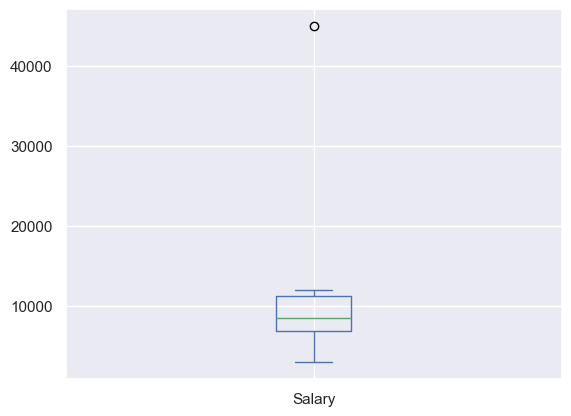

In [70]:
data['Salary'].plot.box()

In [72]:
Q1 = data['Salary'].quantile(0.25)
Q1

6850.0

In [73]:
Q3 = data['Salary'].quantile(0.75)
Q3

11250.0

In [75]:
data.describe().round(2)

,Age,Salary
count,8.00,7.00
mean,32.12,13242.86
std,8.17,14299.05
min,18.00,3000.00
25%,27.50,6850.00
50%,33.50,8500.00
75%,35.75,11250.00
max,45.00,45000.00


In [77]:
IQR = Q3 - Q1
IQR

4400.0

In [78]:
min_outlier = Q1 - 1.5 * IQR
min_outlier

250.0

In [79]:
max_outlier = Q3 + 1.5 * IQR
max_outlier

17850.0

==> Any value (less than min_outlier: 250.0) & (more than max_outlier: 17850.0) is outlier

In [93]:
# Outlier Data
data[(data['Salary'] < min_outlier) | (data['Salary'] > max_outlier)]

,First Name,Last Name,Age,Salary,Region,Purchased
4,Mustafa,Jalil,38.0,45000.0,Africa,Yes


In [99]:
# Data Without outliers

data = data[(data['Salary'] >= min_outlier) & (data['Salary'] <= max_outlier)]
data


,First Name,Last Name,Age,Salary,Region,Purchased
0,Ahmed,Radwan,35.0,3000.0,Asia,No
1,Mustafa,Othman,34.0,12000.0,Africa,Yes
2,Omnia,Nasser,28.0,7000.0,Africa,No
3,Saddik,Burhan,45.0,8500.0,Europe,No
6,Abulrahman,NaN,26.0,6700.0,Asia,No
7,Mohamed,Ouda,33.0,10500.0,Asia,Yes


<Axes: >

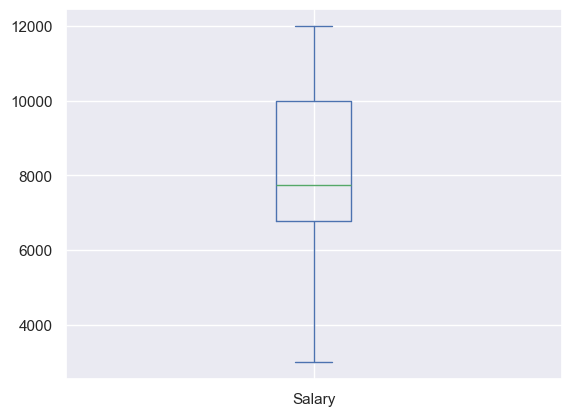

In [100]:
data['Salary'].plot.box()

## Data Splitting for Model Testing

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
from sklearn.datasets import load_iris

In [109]:
iris = load_iris()
iris.data   # Features (X Columns)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [110]:
iris.target  # Targer / Labels (Y Column)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [106]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [111]:
X, y = iris.data, iris.target

In [112]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [113]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [117]:
X_test

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3

In [119]:
y_train

array([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0,
       2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2,
       2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2,
       1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [120]:
X_test

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3

In [121]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])